In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import os
print(os.listdir(os.curdir))

['.git', '.gitignore', '.ipynb_checkpoints', 'Benson Challenges - Max.ipynb', 'README.md', 'Subway Challenge Week 1.ipynb', 'Turnstile Data Downloader.ipynb', 'turnstile_data']


## Challenge 1

In [2]:
turnstile_path = 'turnstile_data/'
file_names = os.listdir(turnstile_path)

In [3]:
df = pd.DataFrame()
for f in file_names[400:405]:
    df = pd.concat([df,pd.read_csv(turnstile_path + f)])
df = df.reset_index(drop = True)

In [4]:
for col in df.columns:
    df = df.rename(columns={col: col.rstrip()})

In [5]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,03:00:00,REGULAR,6463109,2187558
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,07:00:00,REGULAR,6463119,2187567
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,11:00:00,REGULAR,6463178,2187654
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,15:00:00,REGULAR,6463373,2187736
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,19:00:00,REGULAR,6463712,2187803


## Challenge 2

In [6]:
df['DATETIME'] = df.DATE + ' '+ df.TIME
df['DATETIME'] = pd.to_datetime(df.DATETIME)
df.DATE = pd.to_datetime(df.DATE)
df.TIME = pd.to_datetime(df.TIME)

df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-30,2020-04-01 03:00:00,REGULAR,6463109,2187558,2017-12-30 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-30,2020-04-01 07:00:00,REGULAR,6463119,2187567,2017-12-30 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-30,2020-04-01 11:00:00,REGULAR,6463178,2187654,2017-12-30 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-30,2020-04-01 15:00:00,REGULAR,6463373,2187736,2017-12-30 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-30,2020-04-01 19:00:00,REGULAR,6463712,2187803,2017-12-30 19:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-30,2020-04-01 23:00:00,REGULAR,6463887,2187833,2017-12-30 23:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-31,2020-04-01 03:00:00,REGULAR,6463926,2187844,2017-12-31 03:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-31,2020-04-01 07:00:00,REGULAR,6463938,2187856,2017-12-31 07:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-31,2020-04-01 11:00:00,REGULAR,6463980,2187919,2017-12-31 11:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-31,2020-04-01 15:00:00,REGULAR,6464138,2187969,2017-12-31 15:00:00


## Challenge 3

In [23]:
#df_diff=df[df['TIME']=='00:00:00']
df_diff = df.sort_values("DATETIME", ascending=True)
df_diff = df_diff.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).first()
df_diff['ENTRIES']= df_diff.groupby(['C/A','UNIT','SCP','STATION'])['ENTRIES'].diff(-1)*-1
df_diff['EXITS']=df_diff.groupby(['C/A','UNIT','SCP','STATION'])['EXITS'].diff(-1)*-1
df_diff = df_diff.dropna()
df_diff.sort_values('DATETIME').head(10)

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS,DATETIME
106229,R121,R290,01-05-00,HOUSTON ST,2017-12-30,1,IRT,2020-04-01,REGULAR,-0.0,-0.0,2017-12-30
114679,R166,R167,02-00-01,86 ST,2017-12-30,1,IRT,2020-04-01,REGULAR,678.0,243.0,2017-12-30
114714,R166,R167,02-00-02,86 ST,2017-12-30,1,IRT,2020-04-01,REGULAR,228.0,390.0,2017-12-30
114749,R168A,R168,00-00-00,96 ST,2017-12-30,123,IRT,2020-04-01,REGULAR,967.0,962.0,2017-12-30
21949,E003,R369,00-05-01,FT HAMILTON PKY,2017-12-30,D,BMT,2020-04-01,REGULAR,205.0,234.0,2017-12-30
114784,R168A,R168,00-00-01,96 ST,2017-12-30,123,IRT,2020-04-01,REGULAR,1446.0,651.0,2017-12-30
21914,E003,R369,00-05-00,FT HAMILTON PKY,2017-12-30,D,BMT,2020-04-01,REGULAR,80.0,108.0,2017-12-30
114819,R168A,R168,00-00-02,96 ST,2017-12-30,123,IRT,2020-04-01,REGULAR,1211.0,671.0,2017-12-30
114854,R168A,R168,00-02-00,96 ST,2017-12-30,123,IRT,2020-04-01,REGULAR,524.0,925.0,2017-12-30
21879,E003,R369,00-03-01,FT HAMILTON PKY,2017-12-30,D,BMT,2020-04-01,REGULAR,47.0,85.0,2017-12-30


In [173]:
# df_max_min = df.groupby(['DATE','STATION','UNIT','C/A','SCP'])['ENTRIES','EXITS'].agg(['max','min']).sort_values('DATE')
# df_max_min.head(10) 

In [174]:
# #df_diff['ENTRIES']['diff'] = df_diff['ENTRIES']['max'] - df_diff['ENTRIES']['min']
# df_diff = pd.DataFrame()
# df_diff['ENTRIES'] = df_max_min.ENTRIES['max']-df_max_min.ENTRIES['min']
# df_diff['EXITS'] = df_max_min.EXITS['max']-df_max_min.EXITS['min']
# df_diff = df_diff.reset_index()
# df_diff.head()

## Challenge 4

In [177]:
df_turnstile = df_diff[(df_diff['STATION'] == "GRD CNTRL-42 ST") &
                       (df_diff['UNIT']=="R045") &
                       (df_diff['C/A']=="R236") &
                       (df_diff['SCP']=="00-06-01")]

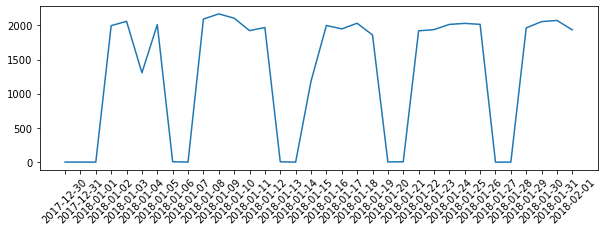

In [192]:
plt.figure(figsize=(10,3))
plt.plot(df_turnstile.DATE,df_turnstile.ENTRIES)
plt.xticks(df_turnstile.DATE,rotation=45);

## Challenge 5

In [179]:
df_grouped = df_diff.groupby(['DATE','STATION','UNIT','C/A'])['ENTRIES','EXITS'].sum()
df_grouped.head()

C:\Users\bubbl\Anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


ENTRIES   EXITS
DATE       STATION UNIT C/A                  
2017-12-30 103 ST  R180 R252   6897.0  6718.0
                   R191 R170   7089.0  1933.0
                   R314 N037   2637.0  2072.0
           111 ST  R355 N138    320.0   157.0
                        N139    583.0   271.0

## Challenge 6

In [180]:
df_station = df_diff.groupby(['DATE','STATION'])['ENTRIES','EXITS'].sum()
df_station = df_station.reset_index()
df_station.head()

C:\Users\bubbl\Anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,DATE,STATION,ENTRIES,EXITS
0,2017-12-30,103 ST,16623.0,10723.0
1,2017-12-30,111 ST,903.0,428.0
2,2017-12-30,116 ST,19024.0,10648.0
3,2017-12-30,116 ST-COLUMBIA,3164.0,1718.0
4,2017-12-30,125 ST,16251.0,16901.0


## Challenge 7

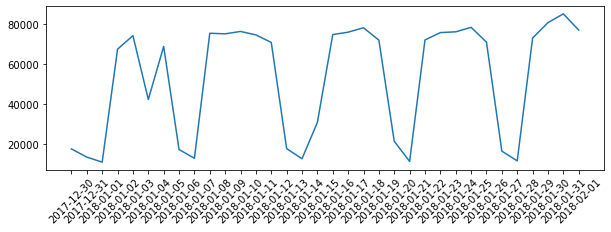

In [191]:
plt.figure(figsize=(10,3))
plt.plot(df_station[(df_station['STATION'] == "GRD CNTRL-42 ST")].DATE,
         df_station[(df_station['STATION'] == "GRD CNTRL-42 ST")].ENTRIES)
plt.xticks(df_station[(df_station['STATION'] == "GRD CNTRL-42 ST")].DATE,rotation=45);

## Challenge 8

In [183]:
df_station['YEAR']=df_station.DATE.dt.year
df_station['WEEK']=df_station.DATE.dt.weekofyear
df_station['DAY']=df_station.DATE.dt.dayofweek #day_name()
df_station.head()

,DATE,STATION,ENTRIES,EXITS,YEAR,WEEK,DAY
0,2017-12-30,103 ST,16623.0,10723.0,2017,52,5
1,2017-12-30,111 ST,903.0,428.0,2017,52,5
2,2017-12-30,116 ST,19024.0,10648.0,2017,52,5
3,2017-12-30,116 ST-COLUMBIA,3164.0,1718.0,2017,52,5
4,2017-12-30,125 ST,16251.0,16901.0,2017,52,5


Week: 52
Week: 1
Week: 2
Week: 3
Week: 4
Week: 5


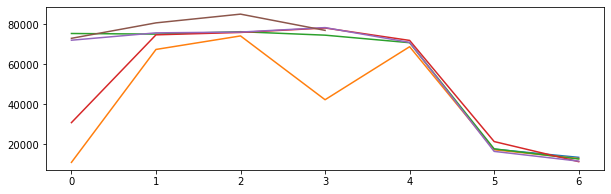

In [184]:
week_count_list = []
plt.figure(figsize=(10,3))
for year in df_station['YEAR'].unique():
    #print("Year: " + str(year))
    for week in df_station[df_station['YEAR'] == year]['WEEK'].unique():
        print("Week: "+ str(week))        
        week_count_df = df_station[(df_station['STATION'] == "GRD CNTRL-42 ST") &
                         (df_station['YEAR'] == year) &
                         (df_station['WEEK'] == week)]
        plt.plot(week_count_df.DAY, week_count_df.ENTRIES)

## Challenge 9

In [185]:
df_choosen_time = df_station[(df_station['WEEK'] > 0) & (df_station['WEEK'] <= 3) ].groupby('STATION')['ENTRIES','EXITS'].sum()
df_choosen_time['RIDERSHIP'] = df_choosen_time['ENTRIES'] + df_choosen_time['EXITS']
df_choosen_time.sort_values('RIDERSHIP',ascending=False).head(10)

C:\Users\bubbl\Anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ENTRIES,EXITS,RIDERSHIP
STATION,,,
14 ST-UNION SQ,1704484.0,1517322.0,3221806.0
GRD CNTRL-42 ST,1058292.0,1040633.0,2098925.0
96 ST,890743.0,685221.0,1575964.0
CANAL ST,757623.0,636051.0,1393674.0
FULTON ST,885271.0,349549.0,1234820.0
7 AV,599116.0,550118.0,1149234.0
72 ST,612520.0,492729.0,1105249.0
28 ST,570250.0,493413.0,1063663.0
8 AV,579953.0,474971.0,1054924.0


## Challenge 10

Text(0.5, 0, 'Log(Ridership)')

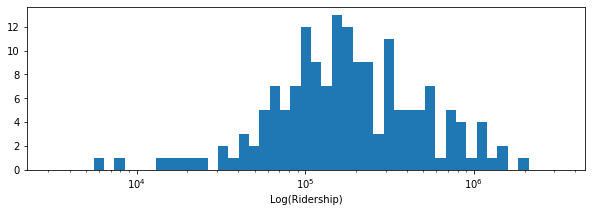

In [189]:
plt.figure(figsize=(10,3))
bins =np.log10(max(df_choosen_time.RIDERSHIP))
bins = np.linspace(3.5,bins,50)
bins = 10**bins
hist = plt.hist(df_choosen_time.RIDERSHIP,bins=bins)
plt.xscale('log')
plt.xlabel("Log(Ridership)")

In [187]:
print(np.log(df_choosen_time.RIDERSHIP))

STATION
103 ST             13.677287
111 ST             10.857151
116 ST                   NaN
116 ST-COLUMBIA    12.639283
125 ST             13.787452
                     ...    
WHITEHALL S-FRY    13.210105
WINTHROP ST        11.841308
WOODHAVEN BLVD           NaN
YORK ST            12.187853
ZEREGA AV          11.306307
Name: RIDERSHIP, Length: 174, dtype: float64


C:\Users\bubbl\Anaconda3\envs\metis\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
